In [4]:
#importing Required Libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
# Loading the data
data=pd.read_csv("DoctorVisits - DA.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [7]:
data.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


Relationship Between Visits and illness


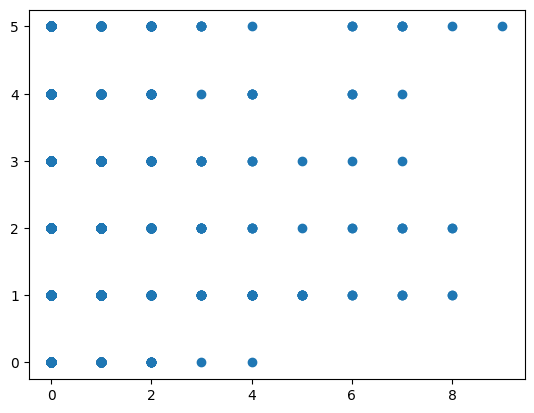

In [8]:
X=data["visits"]
Y=data["illness"]
plt.scatter(X,Y)

**Relationship between the patient Income and number of visits**


Text(0.5, 0, 'Income of Patients')

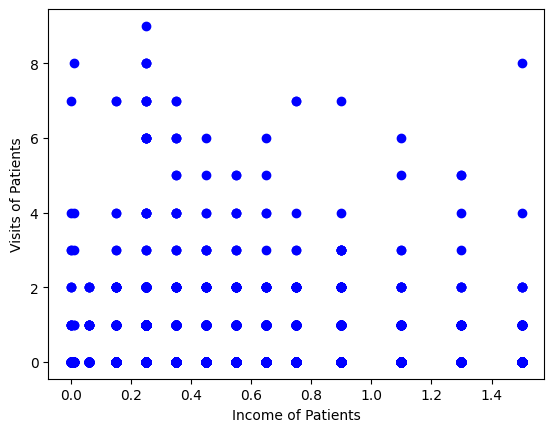

In [9]:
X=data["income"]
Y=data["visits"]
plt.scatter(X,Y,c="blue")
plt.ylabel("Visits of Patients")
plt.xlabel("Income of Patients")

In [10]:
data["illness"].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7afe66a13fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7afe66a48550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afe66a13d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7afe66a48a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7afe66a48d30>],
 'means': []}

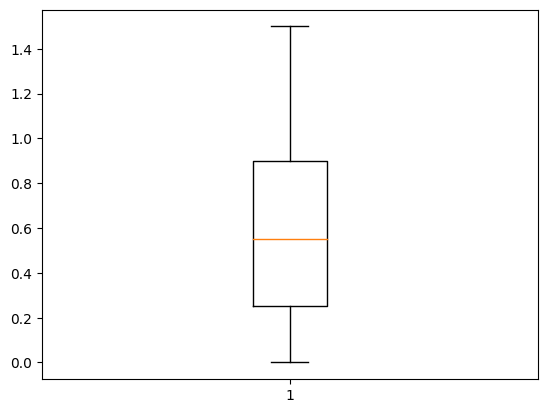

In [11]:
Y=list(data.income)
plt.boxplot(Y)

In [12]:
data.corr()

<ipython-input-12-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,visits,age,income,illness,reduced,health
Unnamed: 0,1.000000,-0.521645,-0.016322,0.074632,-0.290047,-0.245314,-0.194966
visits,-0.521645,1.000000,0.124537,-0.076840,0.223552,0.418954,0.193272
age,-0.016322,0.124537,1.000000,-0.271073,0.204984,0.094745,0.018616
income,0.074632,-0.076840,-0.271073,1.000000,-0.148812,-0.047545,-0.085790
illness,-0.290047,0.223552,0.204984,-0.148812,1.000000,0.218116,0.360110
reduced,-0.245314,0.418954,0.094745,-0.047545,0.218116,1.000000,0.280208
health,-0.194966,0.193272,0.018616,-0.085790,0.360110,0.280208,1.000000


<ipython-input-13-eb5b0ab3f9eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(),cbar=True,annot=True,cmap='Reds')


<Axes: >

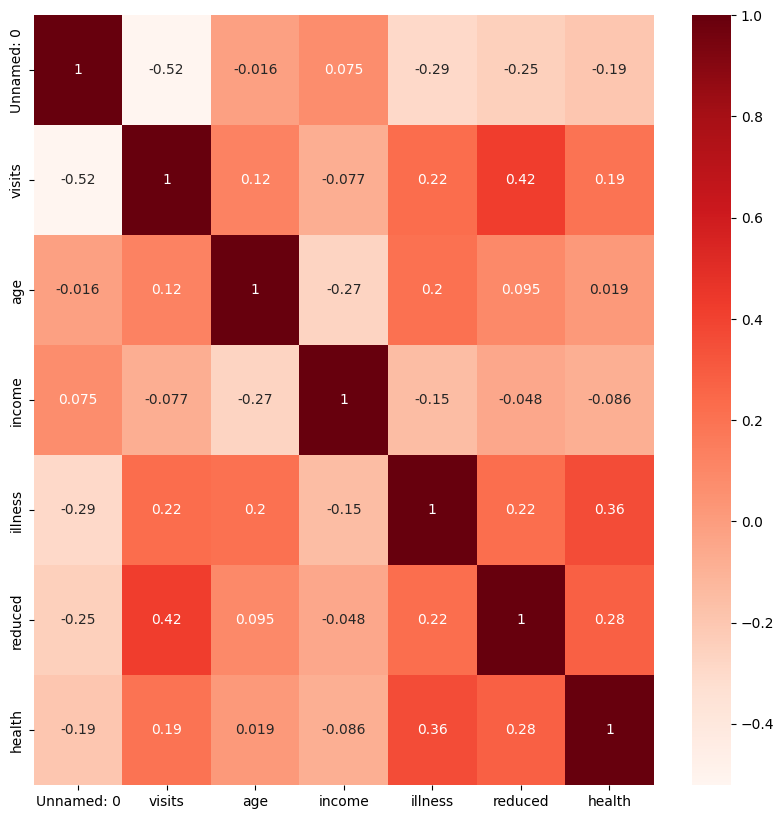

In [13]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(),cbar=True,annot=True,cmap='Reds')

In [14]:
data["gender"].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

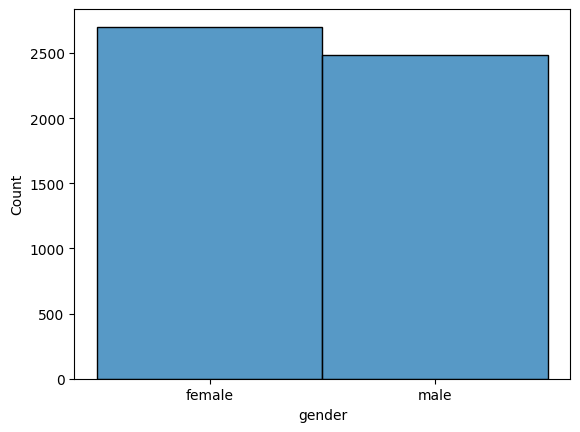

In [15]:
#Number of males and Females affected by illness
sb.histplot(data.gender)


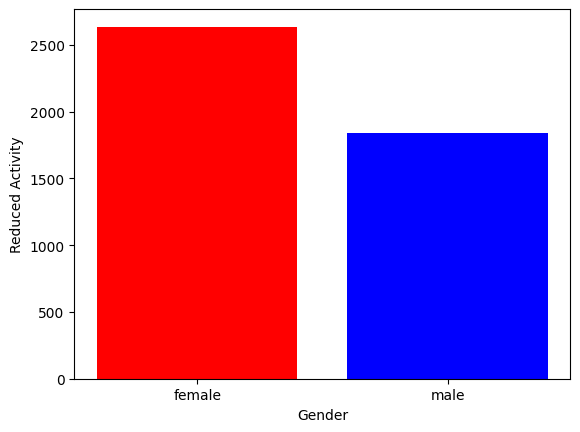

,gender,reduced
0,female,2636
1,male,1837


In [16]:
d1=data.groupby("gender")["reduced"].sum().to_frame().reset_index()
plt.bar(d1["gender"],d1["reduced"],color=['red','blue'])
plt.ylabel("Reduced Activity")
plt.xlabel("Gender")
plt.show()
d1

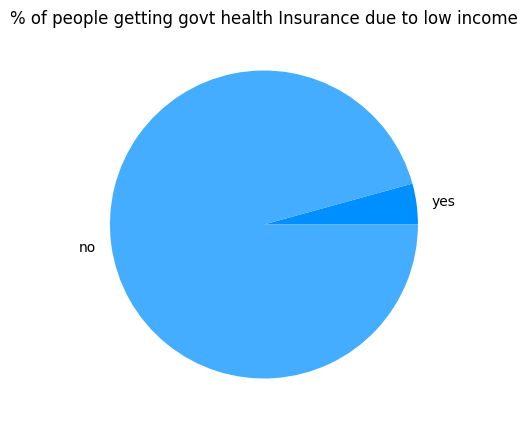

The Datasets are


,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [19]:
label=['yes', 'no']
Y=data[data['freepoor']=='yes']
X = data[data['freepoor']=='no']
x = [Y.shape[0],X.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label,colors=['#008FFF','#45ADFF'])
plt.title("% of people getting govt health Insurance due to low income")
plt.show()
print("The Datasets are")
X.head()

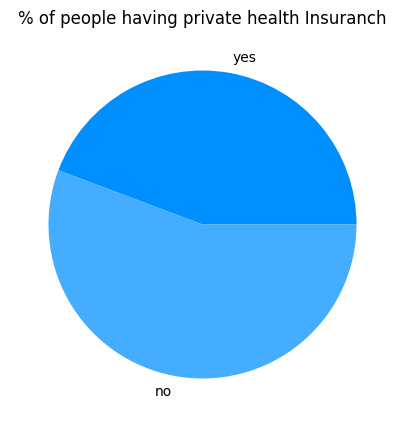

In [20]:
Y = data[data['private']=='yes']
X= data[data['private']=='no' ]
x = [Y.shape[0], X.shape[0]]
plt.figure(figsize=(5,5))
plt.title("% of people having private health Insuranch")
plt.pie(x, labels=label,colors=['#008FFF','#45ADFF'])
plt.show()


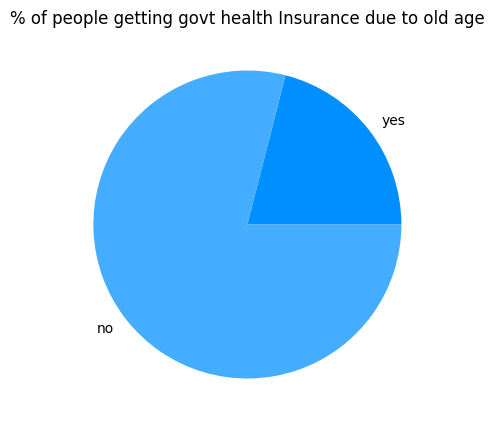

In [21]:
Y = data[data['freerepat']=='yes']
X = data[data['freerepat']=='no' ]
x = [Y.shape[0], X.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label,colors=['#008FFF','#45ADFF'])
plt.title("% of people getting govt health Insurance due to old age")
plt.show()
